In [69]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("SuperMarket Sales Analysis.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [70]:
# What is the total Sales amount
total_Sales_amount = df["Sales"].sum()
print(f'Total Sale Amount: {total_Sales_amount}')

Total Sale Amount: 322966.749


In [71]:
# What is the average sales amount per transaction
df['Total Sales']= df['Quantity']*df['Unit price']+df['Tax 5%']
average_sales_per_transaction = df['Total Sales'].mean()
print(f'Average Sales Amount per Transaction: {average_sales_per_transaction:.2f}')


Average Sales Amount per Transaction: 322.97


             Product line  Quantity
0  Electronic accessories       971
1     Fashion accessories       902
2      Food and beverages       952
3       Health and beauty       854
4      Home and lifestyle       911
5       Sports and travel       920


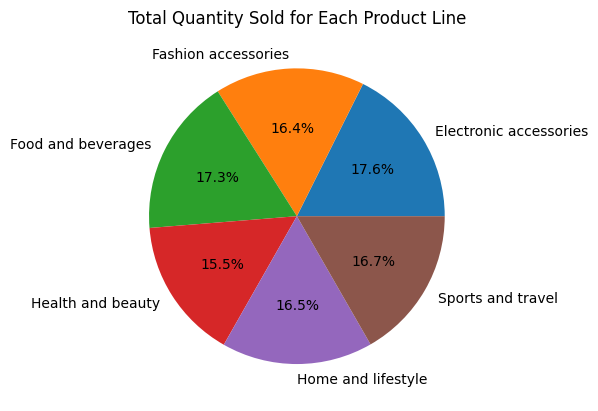

In [72]:
# What is the total quantity sold for each product line
total_quantity_per_category = df.groupby('Product line')['Quantity'].sum().reset_index()
print(total_quantity_per_category)

plt.pie(total_quantity_per_category['Quantity'], labels=total_quantity_per_category['Product line'], autopct='%1.1f%%')
plt.title('Total Quantity Sold for Each Product Line')
plt.show()


In [73]:
# Which product is the top seller
total_sales_per_product = df.groupby('Product line')['Sales'].sum().reset_index()
top_selling_product = total_sales_per_product.sort_values(by='Sales', ascending=False).head(1)
print(top_selling_product)


         Product line      Sales
2  Food and beverages  56144.844


In [74]:
# How many unique customer are there
unique_customers = df['Customer type'].nunique()
print(f'Number of Unique Customers: {unique_customers}')

Number of Unique Customers: 2


City with Highest Sales: Naypyitaw with total sales of 110,568.71


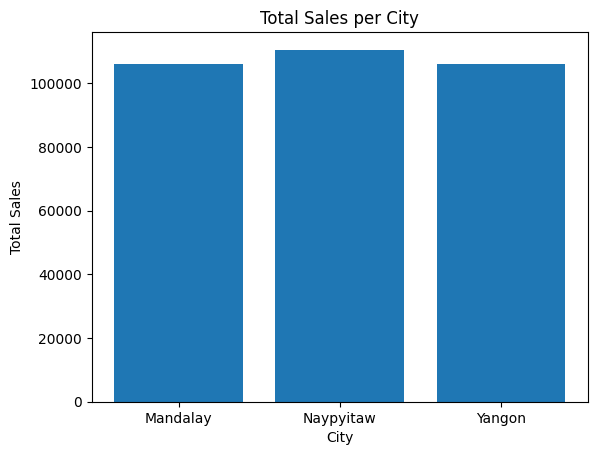

In [75]:
# Which city is highest sale
city_sales = df.groupby('City')['Sales'].sum()
highest_sales_city = city_sales.idxmax()
highest_sales_value = city_sales.max()

print(f'City with Highest Sales: {highest_sales_city} with total sales of {highest_sales_value:,.2f}')

plt.bar(city_sales.index, city_sales.values)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales per City')
plt.show()


In [76]:
# Get the total number of customer type is Member
total_members = df[df['Customer type'] == 'Member'].shape[0]
print(f'Total Number of Customers who are Members: {total_members}')



Total Number of Customers who are Members: 565


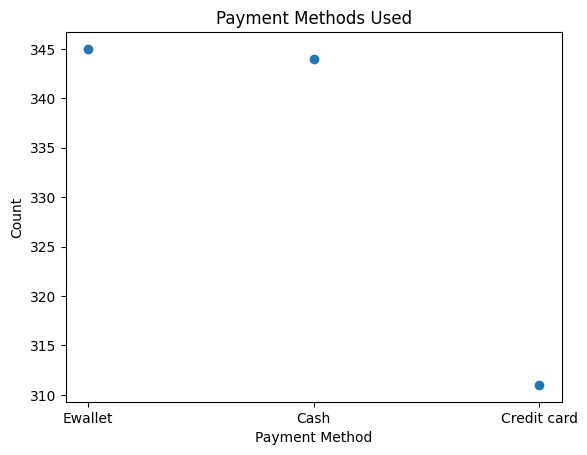

In [77]:
#What payment methods are most commonly used?
payment_counts = df['Payment'].value_counts()
plt.scatter(payment_counts.index, payment_counts.values)
plt.title("Payment Methods Used")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()
